## Project #3

#### Team #2:
* Andrew George
* Tigist Wujira
* Beza Arega
* Nataliia Padilla

### About the Dataset
https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data

The "Salary Prediction Dataset" is a synthetic dataset generated for the purpose of exploring salary prediction tasks. It contains simulated data reflecting various factors influencing salary levels such as education, experience, location, job title, age, and gender. This dataset can be utilized for predictive modeling tasks to estimate salaries based on these factors.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrsimple07/salary-prediction-data")

print("Path to dataset files:", path)

100%|██████████| 16.2k/16.2k [00:00<00:00, 3.42MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/salary-prediction-data/versions/1


In [3]:
df = pd.read_csv(path + "/salary_prediction_data.csv")
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [4]:
df['Salary'] = df['Salary'].round(0)
print(df.head())

     Education  Experience  Location Job_Title  Age  Gender    Salary
0  High School           8     Urban   Manager   63    Male   84620.0
1          PhD          11  Suburban  Director   59    Male  142591.0
2     Bachelor          28  Suburban   Manager   61  Female   97800.0
3  High School          29     Rural  Director   45    Male   96835.0
4          PhD          25     Urban   Analyst   26  Female  132158.0


In [5]:
#create a new column 'wage_category' based on Salary and separate it into high, medium and low
df['wage_category'] = pd.cut(df['Salary'], bins=[0, 85032, 126804, np.inf], labels=['low', 'medium', 'high'])


df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary,wage_category
0,High School,8,Urban,Manager,63,Male,84620.0,low
1,PhD,11,Suburban,Director,59,Male,142591.0,high
2,Bachelor,28,Suburban,Manager,61,Female,97800.0,medium
3,High School,29,Rural,Director,45,Male,96835.0,medium
4,PhD,25,Urban,Analyst,26,Female,132158.0,high


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Education      1000 non-null   object  
 1   Experience     1000 non-null   int64   
 2   Location       1000 non-null   object  
 3   Job_Title      1000 non-null   object  
 4   Age            1000 non-null   int64   
 5   Gender         1000 non-null   object  
 6   Salary         1000 non-null   float64 
 7   wage_category  1000 non-null   category
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 55.9+ KB


In [7]:
#Check unique values for all columns except Salary
for col in df.columns:
    if col != 'Salary':
        print(col, df[col].unique())

Education ['High School' 'PhD' 'Bachelor' 'Master']
Experience [ 8 11 28 29 25 19  4 13 20 14 23  1  7 26  3 21 12  5 10  2 16 24  6 22
  9 17 27 18 15]
Location ['Urban' 'Suburban' 'Rural']
Job_Title ['Manager' 'Director' 'Analyst' 'Engineer']
Age [63 59 61 45 26 27 60 49 25 58 23 43 44 37 53 34 62 36 21 20 35 28 40 22
 50 33 31 47 64 24 57 32 48 46 42 51 41 56 54 30 38 29 52 39 55]
Gender ['Male' 'Female']
wage_category ['low', 'high', 'medium']
Categories (3, object): ['low' < 'medium' < 'high']


In [8]:
#replace categorical values with numerical
education_map = {'High School' : 1, 'Bachelor' : 2, 'Master' : 3, 'PhD' : 4}
df['Education'] = df['Education'].map(education_map)
location_map = {'Rural' : 1, 'Suburban' : 2, 'Urban' : 3}
df['Location'] = df['Location'].map(location_map)
job_title_map = {'Engineer' : 1, 'Analyst' : 2, 'Manager' : 3, 'Director' : 4}
df['Job_Title'] = df['Job_Title'].map(job_title_map)
gender_map = {'Female' : 1, 'Male' : 2}
df['Gender'] = df['Gender'].map(gender_map)
wage_map = {'low' :1,'medium' :2, 'high' :3}
df['wage_category'] = df['wage_category'].map(wage_map)
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary,wage_category
0,1,8,3,3,63,2,84620.0,1
1,4,11,2,4,59,2,142591.0,3
2,2,28,2,3,61,1,97800.0,2
3,1,29,1,4,45,2,96835.0,2
4,4,25,3,2,26,1,132158.0,3


In [9]:
# Replace string values with numbers
df['wage_category'] = df['wage_category'].replace({'low': 1, 'medium': 2, 'high': 3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Education      1000 non-null   int64   
 1   Experience     1000 non-null   int64   
 2   Location       1000 non-null   int64   
 3   Job_Title      1000 non-null   int64   
 4   Age            1000 non-null   int64   
 5   Gender         1000 non-null   int64   
 6   Salary         1000 non-null   float64 
 7   wage_category  1000 non-null   category
dtypes: category(1), float64(1), int64(6)
memory usage: 55.9 KB


In [10]:
df.describe()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.488000,14.771000,1.965000,2.562000,42.377000,1.516000,105558.412000
std,1.123886,8.341111,0.808968,1.120451,13.609412,0.499994,28256.971381
min,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,33511.000000
25%,1.000000,7.000000,1.000000,2.000000,30.000000,1.000000,85032.000000
50%,2.000000,15.000000,2.000000,3.000000,43.000000,2.000000,104314.500000
75%,4.000000,22.000000,3.000000,4.000000,55.000000,2.000000,126803.750000
max,4.000000,29.000000,3.000000,4.000000,64.000000,2.000000,193017.000000


In [11]:
df.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0
wage_category,0


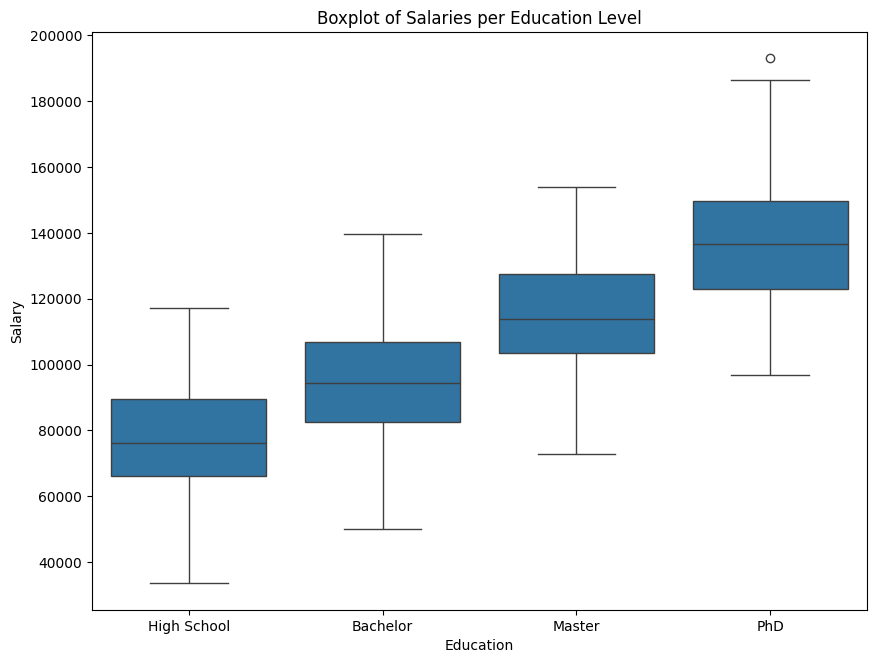

In [12]:
#boxplot of salary per education type
plt.figure(figsize=(10, 7.5))
sns.boxplot(x='Education', y='Salary', data=df)
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Boxplot of Salaries per Education Level')
plt.xticks([0, 1, 2, 3],['High School','Bachelor' ,'Master' ,'PhD'])
plt.show()

There is a clear positive relationship between education level and salary. As education level increases, the median salary and salary range both increase. The outlier above 180,000 suggests that a few PhD holders earn exceptionally high salaries while the relatively small salary range for High School education shows limited earning potential.

<Axes: >

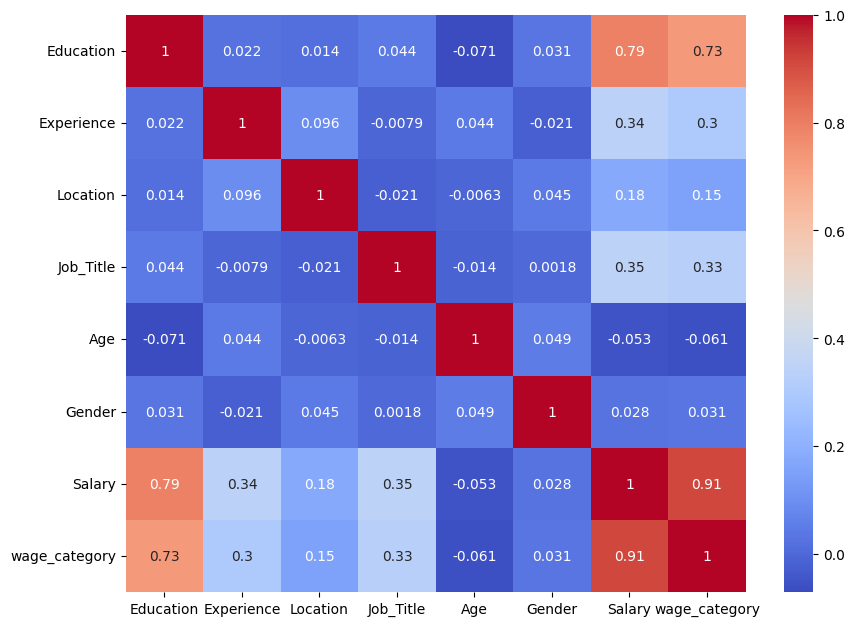

In [13]:
#correlation heatmap
plt.figure(figsize=(10, 7.5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

The correlation coefficient between Salary and Education is 0.79 indicating a strong positive correlation where higher education levels are generally associated with higher salaries. There is a moderate positive correlation between Salary and Experience of 0.34, suggesting that experience has some impact on salary, though it is not as strong as education. There is a weak positive correlation between Salary and Age of 0.18, indicating that age has a minor relationship with salary. The correlation coefficient between Salary and Gender is 0.02, which is almost negligible. Education and Experience have a weak correlation of 0.22, showing that they are somewhat independent of each other. Most other variables such as job location have very low or negligible correlations with Salary.

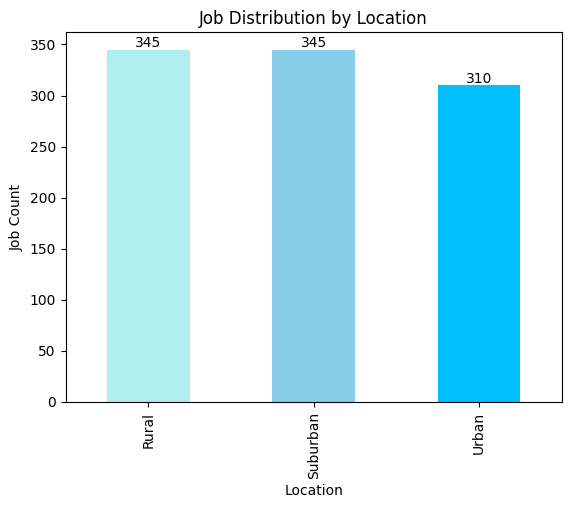

In [14]:
location_numbers = df['Location'].value_counts()
ax = location_numbers.plot(kind='bar', color=['paleturquoise', 'skyblue', 'deepskyblue'])
plt.title("Job Distribution by Location")
plt.ylabel("Job Count")
plt.xticks([0, 1, 2],['Rural' ,'Suburban' ,'Urban'])
ax.bar_label(ax.containers[0])
plt.show()

The job oppurtunity by location is equal for Rural and Suburban by 345 oppurtunites. Urban is slightly below with a total count of 310 opputrunites. This bar graph shows us that it is evenly distributed.

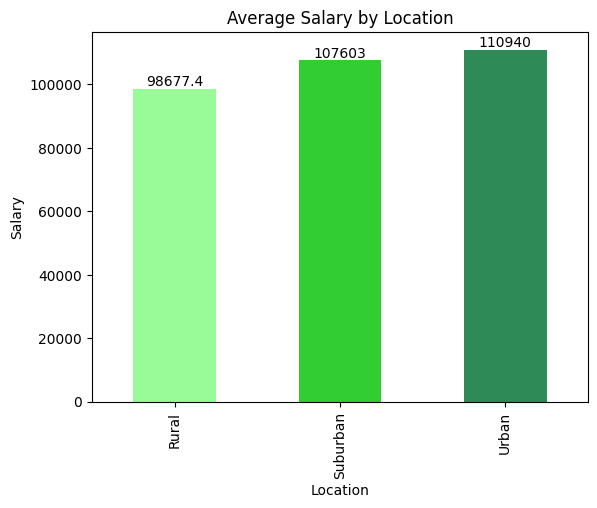

In [15]:
Avg_salary_by_location = df.groupby('Location')['Salary'].mean()
ax = Avg_salary_by_location.plot(kind='bar', color=['palegreen', 'limegreen', 'seagreen'])
plt.title("Average Salary by Location")
plt.ylabel("Salary")
plt.xticks([0, 1, 2],['Rural' ,'Suburban' ,'Urban'])
ax.bar_label(ax.containers[0])
plt.show()

The graph visualizes the average salary by location. Ubran has the highest salary with 110,940. Suburban is the second highest salary with 107,603 and rural is the one with the lowest average salary with 98,677.40.

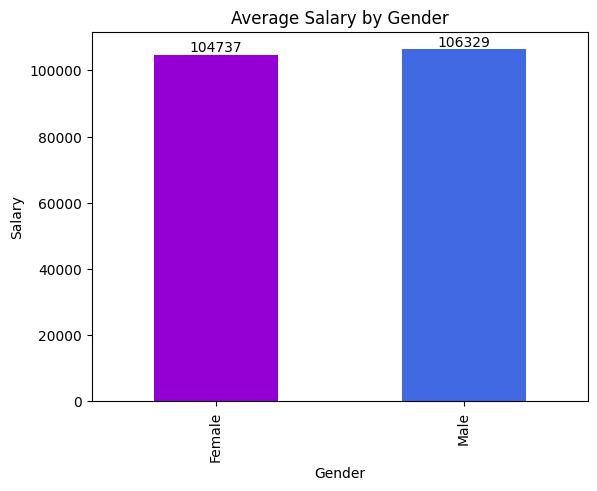

In [16]:
Avg_salary_by_gender = df.groupby('Gender')['Salary'].mean()
ax = Avg_salary_by_gender.plot(kind='bar', color=['darkviolet', 'royalblue'])
plt.title("Average Salary by Gender")
plt.ylabel("Salary")
plt.xticks([0, 1],['Female' ,'Male'])
ax.bar_label(ax.containers[0])
plt.show()

**Logistic Regression**

In [17]:
# Features and target
X = df[['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender']]
y = df['wage_category']


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initialize and train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


# Make predictions
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print('Classes:', logreg.classes_)
print('Intercept:', logreg.intercept_)
print('Coefficients:', logreg.coef_)

Classes: [1 2 3]
Intercept: [ 2.47899106  0.9109831  -3.38997415]
Coefficients: [[-1.884404   -0.08479612 -0.15781109 -0.60409761  0.03904095  1.75538789]
 [ 0.29272638 -0.00398568  0.13875856  0.03763046 -0.01111789 -0.1041116 ]
 [ 1.59167762  0.0887818   0.01905253  0.56646715 -0.02792306 -1.65127629]]


A higher education decreases the likelihood of Class 1 (lower income) but significantly increases the likelihood of Class 3 (higher income) while only having a small positive impact on Class 2. Similarly, gender is also a strong indicator of Class 1 and 3 but no so much for class 2. Job title reduces the chances of being in Class 1 but increases the likelihood of being in Class 3. In terms of location, people  in urban areas are more likely to fall into Class 2, while people in rural areas most likely to belong to Class 1.  Interestingly, location is the second highest contributer to class 2 while on the other hand, it has the weakest influence on Class 3 compared to other features. Overall, experience has relatively small effects but slightly favors Class 3.

In [21]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.71      0.69        42
           2       0.73      0.76      0.74       108
           3       0.71      0.60      0.65        50

    accuracy                           0.71       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.71      0.71      0.71       200


Confusion Matrix:
 [[30 11  1]
 [15 82 11]
 [ 0 20 30]]


The model performs best on Class 2 (the middle wage category) with higher recall and precision, most likely due to its larger sample size. Class 1 has decent performance with 67% precision and 71% recall, but it is often confused with Class 2 as seen in the matrix. Class 3 struggles the most, with a lower recall of 60%, indicating that 40% of true Class 3 samples are misclassified, all as Class 2. Overall, the model has fairly good accuracy with slightly imbalanced class performance.

In [22]:
# Predict the class probabilities
y_pred_proba = logreg.predict_proba(X_test)
#Print first 5 predictions and probabilities
print("Predicted Classes:", y_pred[:5])
print("Predicted Probabilities:", y_pred_proba[:5])

Predicted Classes: [1 1 2 2 2]
Predicted Probabilities: [[8.56580226e-01 1.41172294e-01 2.24748081e-03]
 [9.75978538e-01 2.39423847e-02 7.90777228e-05]
 [2.01650854e-02 6.74707290e-01 3.05127625e-01]
 [3.17445389e-02 7.68505579e-01 1.99749882e-01]
 [3.02229004e-01 6.41313938e-01 5.64570581e-02]]


In [23]:
from sklearn.multiclass import OneVsOneClassifier

#One-Versus-All
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)
y_pred_ova = model_ova.predict(X_test)

#One-Versus-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)
y_pred_ovo = model_ovo.predict(X_test)

# Compare Results
print("Accuracy (One-Versus-All):", accuracy_score(y_test, y_pred_ova))
print("Accuracy (One-Versus-One):", accuracy_score(y_test, y_pred_ovo))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (One-Versus-All): 0.795
Accuracy (One-Versus-One): 0.78


The One vs All approach performed slightly better, getting nearly 80% accuracy. This suggests that the classes in the dataset may be sufficiently distinct from one another in their relationship with "all others," as OvA works well when there is a clear distinction between a single class and the rest.